# Seeds Data Set
Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.<br />
###### Attribute Information:
1. area A, 
2. perimeter P
3. Compactness
4. Length of Kernel 
5. Width of Kernel 
6. Asymmetry coefficient  
7. Length of kernel groove.
8. Type

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('seeds_dataset.csv')#.astype(np.float32)
df.columns = ['Area','Perimeter','Compactness','Length','Width','Asymmetry','Groove Length', 'Type']

In [3]:
print('df type: ' + str(type(df)))
print('df size: ' + str(df.shape))
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df size: (211, 8)


,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove Length,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1


###### Oberving the Data Set
1. Checks for null values.
2. Sees how many classes/categories there are.
3. Counts the data points that belong to each category.

In [4]:
#Observing the Leaf Data Set.
print('Number of NULL values in df: ' + str(df.isnull().sum().sum())) 

uniqueClasses = df['Type'].unique()
print('Number of unique classes in df: ' + str(uniqueClasses.shape))
uniqueClasses = np.sort(uniqueClasses)

for i in uniqueClasses:
    print('Class ' + str(i) + ' count: ' + str((df['Type']==i).sum()))

Number of NULL values in df: 0
Number of unique classes in df: (3,)
Class 1 count: 71
Class 2 count: 70
Class 3 count: 70


###### Shuffle Data Randomly
1. Saves the first random shuffle of the original df.
2. Saves the second random shuffle of the original df.
3. Saves the third random shuffle of the original df.

In [5]:
df_shuffle1 = df.sample(frac=1)
#df_shuffle1.head()

In [6]:
df_shuffle2 = df.sample(frac=1)
#df_shuffle2.head()

In [7]:
df_shuffle3 = df.sample(frac=1)
#df_shuffle3.head()

###### F(X) = Y
Separates data into X and Y (labels) to set up the rest of the supervised learning algos in the [ F(X) = Y ] format.
1. Sets up F(X1) = Y1 from the first random shuffle of the original df.
2. Sets up F(X2) = Y2 from the second random shuffle of the original df.
3. Sets up F(X3) = Y3 from the third random shuffle of the orignal df.

In [8]:
df_array1 = np.array(df_shuffle1)              #Convert dataframe to array in order to slice into X and Y.

X1 = df_array1[:, 0:(df_array1.shape[1] - 1)]  #First Column to second before last column. All numerical Features.
Y1 = df_array1[:, (df_array1.shape[1] - 1)]    #Last column represents the classes which are all numerical.
print('X1 shape: ' + str(X1.shape))
print('Y1 shape: ' + str(Y1.shape))

X1 shape: (211, 7)
Y1 shape: (211,)


In [9]:
df_array2 = np.array(df_shuffle2)              #Convert dataframe to array in order to slice into X and Y.

X2 = df_array2[:, 0:(df_array2.shape[1] - 1)]  #First Column to second before last column. All numerical Features.
Y2 = df_array2[:, (df_array2.shape[1] - 1)]    #Last column represents the classes which are all numerical.
print('X2 shape: ' + str(X2.shape))
print('Y2 shape: ' + str(Y2.shape))

X2 shape: (211, 7)
Y2 shape: (211,)


In [10]:
df_array3 = np.array(df_shuffle3)              #Convert dataframe to array in order to slice into X and Y.

X3 = df_array3[:, 0:(df_array3.shape[1] - 1)]  #First Column to second before last column. All numerical Features.
Y3 = df_array3[:, (df_array3.shape[1] - 1)]    #Last column represents the classes which are all numerical.
print('X3 shape: ' + str(X3.shape))
print('Y3 shape: ' + str(Y3.shape))

X3 shape: (211, 7)
Y3 shape: (211,)


###### Functions Used For All Classifiers
1. partitionData
2. viewSplit
3. draw_heatmap_linear
4. bestValue
5. ViewConfusionMatrix
6. displayAccuracies

In [11]:
#X: Features of df.
#Y: Labels of df.
#percent: The percentage given to the training_validation set.
def partitionData(X, Y, percent):
    X_train_val = X[:int(percent*len(X))] # Get features from train + val set.
    Y_train_val = Y[:int(percent*len(Y))] # Get labels from train + val set.
    X_test      = X[int(percent*len(X)):] # Get features from test set.     
    Y_test      = Y[int(percent*len(Y)):] # Get labels from test set.
    
    return X_train_val, Y_train_val, X_test, Y_test

In [12]:
#PURPOSE: Used to see the dimensions of the data after being partioned.
#Prints the shape of X_train_val.
#Prints the shape of Y_train_val.
#Prints the shape of X_test.
#Prints the shape of Y_test.
#Prints num of UNIQUE classes in Y_train_val.
#Prints the num of data points that belong to each class/category.
#Prints num of UNIQUE classes in Y_test.
def viewSplit(X_train_val, Y_train_val, X_test, Y_test):
    print('X_train_val shape: ' + str(X_train_val.shape))
    print('Y_train_val shape: ' + str(Y_train_val.shape))
    print('X_test: ' + str(X_test.shape))
    print('Y_test: ' + str(Y_test.shape))

    uniqueClasses = df['Type'].unique()
    print('Number of unique classes in df: ' + str(uniqueClasses.shape))
    uniqueClasses = np.sort(uniqueClasses)
    
    uniqueClasses_Y_train_val = np.unique(Y_train_val)
    print('Number of unique classes in Y_train_val: ' + str(uniqueClasses_Y_train_val.shape))
    for i in uniqueClasses:
        print('Class ' + str(i) + ' count: ' + str((Y_train_val[:]==i).sum()))
    uniqueClasses_Y_test = np.unique(Y_test)
    print('Number of unique classes in Y_test: ' + str(uniqueClasses_Y_test.shape))

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

#PURPOSE: Draw heatmaps for result of grid search and find best C for validation set.
def draw_heatmap_linear(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [14]:
#PURPOSE: Searches for the highest value in accuracyValidation, then uses the index of the highest value
#         to find what value in the list caused this.
def bestValue(accuracyValidation, valueList):
    max_value_of_accV = np.max(accuracyValidation)
    max_index_of_accV = np.argmax(accuracyValidation)
    print('Largest value in accuracyValidation is ' + str(max_value_of_accV) + ' from index ' + str(max_index_of_accV) + '.')
    return valueList[max_index_of_accV]

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def ViewConfusionMatrix(Y_test, pred):
    print('Original labels:\n' + str(Y_test))
    print('Original Labels or Y_test shape: ' + str(Y_test.shape))
    print('Predicted labels:\n' + str(pred))

    #Note that the shape of the confusion matrix is not based on the shape of the Y_test or pred, but instead on 
    #how many unique classes were inside of these.
    print('\nTest Accuracy Score: ' + str(accuracy_score(Y_test, pred)))
    print(classification_report(Y_test, pred))
    confusionMatrix = confusion_matrix(Y_test, pred)
    print('Confusion Matrix shape: ' + str(confusionMatrix.shape))
    print(confusionMatrix) #Remove because it takes up to much space.....

In [16]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

def displayAccuracies(stringClfName, stringDataName, acc80_20, acc50_50, acc20_80):
 
    objects = ('80%train,20%test', '50%train,50%test', '20%train,80%test')
    y_pos = np.arange(len(objects))
    performance = [acc80_20,acc50_50,acc20_80]
 
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Accuracy')
    plt.title(str(stringClfName) +'\'s Test Accuracies of 3 Partitions on ' + str(stringDataName))
    plt.grid() #new
    plt.show()

In [17]:
#PURPOSE to print out the accuracies of 3 trials for each of the 3 partitions. 
def printAccuracies(stringClgName, list_80_20, list_50_50, list20_80):
    
    print('Accuracy of ' + str(stringClgName) +'\'s 3 trials on (80% train, 20% test) partition :' + str(list_80_20)) 
    accuracyAverage_80_20 = np.mean(list_80_20)
    print('Mean Accuracy of ' + str(stringClgName) +' on (80% train, 20% test) partition: ' + str(accuracyAverage_80_20))

    print('\nAccuracy of ' + str(stringClgName) + '\'s 3 trials on (50% train, 50% test) partition :' + str(list_50_50))
    accuracyAverage_50_50 = np.mean(list_50_50)
    print('Mean Accuracy of ' + str(stringClgName) + ' on (50% train, 50% test) partition: ' + str(accuracyAverage_50_50))

    print('\nAccuracy of ' + str(stringClgName) + '\'s 3 trials on (20% train, 80% test) partition:' + str(list20_80))
    accuracyAverage_20_80 = np.mean(list20_80)
    print('Mean Accuracy of ' + str(stringClgName) + ' on (20% train, 80% test) partition: ' + str(accuracyAverage_20_80))

###### Global Variables
CV: The number of folds that happens in the cross validation produced by GridSearchCV.

In [18]:
#Recommend running final test with CV=10, but during staging use CV=3.
CV = 10

# Support Vector Machine (SVM)
Its a supervised machine learning algorithm which can be used for both classification or regression problems. But it is usually used for classification. Given 2 or more labeled classes of data, it acts as a discriminative classifier, formally defined by an optimal hyperplane that separates all the classes.

In [19]:
#GLOBAL VARIABLES FOR SVM
C_list = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100]
SVM_accuracyTestList_80_20 = []
SVM_accuracyTestList_50_50 = []
SVM_accuracyTestList_20_80 = []

In [20]:
from sklearn import svm

#C_list: C hyperparameter.
#cv: Number of folds when doing cross validation.
def svmTrainValidation(X_train_val, Y_train_val, C_list, CV):
    
    svm_classifier = svm.SVC(kernel = 'linear')
    
    parameters = {'C':C_list}
    
    SVM_clfGridSearch = GridSearchCV(svm_classifier, param_grid=parameters, cv=CV, return_train_score=True)
    SVM_clfGridSearch.fit(X_train_val, Y_train_val) 
    
    #accuracyTrain = clfGridSearch.cv_results_['mean_train_score']      
    #accuracyValidation = clfGridSearch.cv_results_['mean_test_score']
    return SVM_clfGridSearch

### SVM on (80% train, 20% test)
Splits the 3 shuffled datasets into 2 parts:
1. (80% of all the data points) ---> Training set + Validation Set.
2. (20% of all the data points) ---> Test set.

In [21]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.8)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.8)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.8)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

[ 0.34524596  0.34524596  0.72283041  0.91406777  0.91935311  0.94907774
  0.96763055  0.98811369]
[ 0.3452381   0.3452381   0.71428571  0.9047619   0.92261905  0.92857143
  0.92857143  0.94642857]


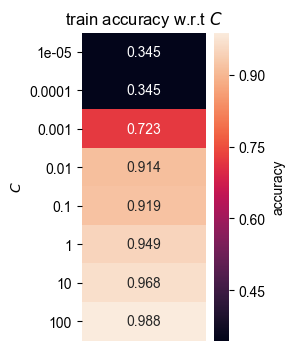

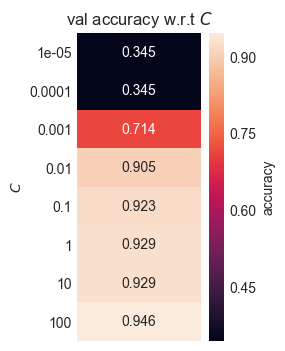

In [22]:
SVM_clfGridSearch = svmTrainValidation(X1_train_val, Y1_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [23]:
#Use the best C to calculate the test accuracy.
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)
# correct = [(a==b) for (a,b) in zip(pred,Y1_test)]
# test_acc = sum(correct) * 1.0 / len(correct)
# print('Test Accuracy Score: ' + str(test_acc))

#accuracy(ORIGINAL_VALUES, PREDICTED_VALUES)
accuracyTest = accuracy_score(Y1_test, pred)
SVM_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.946428571429 from index 7.
Best C: 100
Test Accuracy Score: 0.976744186047


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.36905357  0.36905357  0.71361521  0.894857    0.90145797  0.93644972
  0.95106017  0.97951272]
[ 0.36904762  0.36904762  0.7202381   0.89880952  0.89285714  0.92261905
  0.94642857  0.95833333]


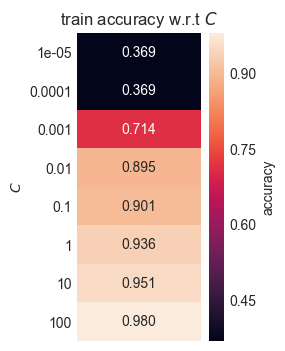

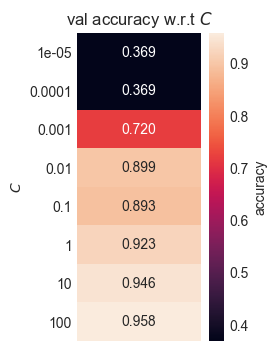

In [24]:
SVM_clfGridSearch = svmTrainValidation(X2_train_val, Y2_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [25]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
SVM_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.958333333333 from index 7.
Best C: 100
Test Accuracy Score: 1.0


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.35119739  0.35119739  0.68639496  0.90409204  0.91533341  0.93849118
  0.96363153  0.98479813]
[ 0.35119048  0.35119048  0.69047619  0.89880952  0.9047619   0.93452381
  0.95238095  0.95238095]


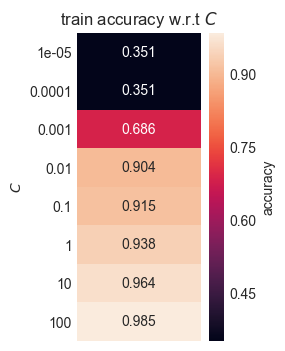

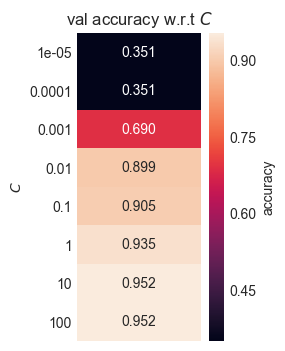

In [26]:
SVM_clfGridSearch = svmTrainValidation(X3_train_val, Y3_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [27]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
SVM_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.952380952381 from index 6.
Best C: 10
Test Accuracy Score: 0.953488372093


###### Mean of SVM's Test Accuracies on (80% train, 20% test)

In [28]:
import statistics 

print('SVM_accuracyTestList:' + str(SVM_accuracyTestList_80_20))
SVM_accuracyAverage_80_20 = statistics.mean(SVM_accuracyTestList_80_20)
print('SVM_accuracyTestList mean: ' + str(SVM_accuracyAverage_80_20))

SVM_accuracyTestList:[0.97674418604651159, 1.0, 0.95348837209302328]
SVM_accuracyTestList mean: 0.976744186047


### SVM on (50% train, 50% test)
Splits the 3 shuffled datasets into 2 parts:
1. (50% of all the data points) ---> Training set + Validation Set.
2. (50% of all the data points) ---> Test set.

In [29]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.5)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.5)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.5)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

[ 0.37144743  0.37144743  0.56505397  0.89732744  0.90684663  0.9418103
  0.96406305  0.97993186]
[ 0.37142857  0.37142857  0.56190476  0.88571429  0.88571429  0.9047619
  0.92380952  0.8952381 ]


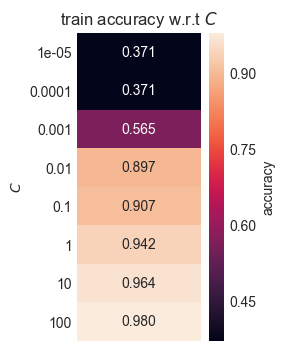

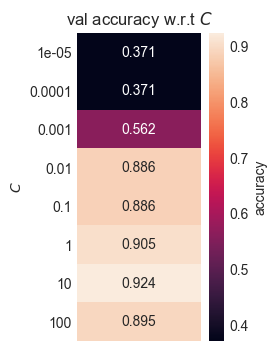

In [30]:
SVM_clfGridSearch = svmTrainValidation(X1_train_val, Y1_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [31]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
SVM_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.92380952381 from index 6.
Best C: 10
Test Accuracy Score: 0.905660377358


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.43810913  0.43810913  0.72386468  0.89839496  0.91327857  0.95661104
  0.97142888  0.99788306]
[ 0.43809524  0.43809524  0.72380952  0.87619048  0.9047619   0.93333333
  0.93333333  0.94285714]


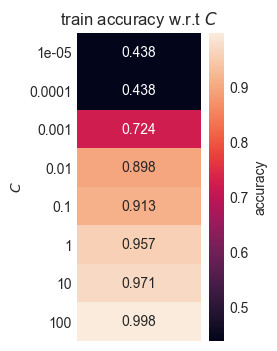

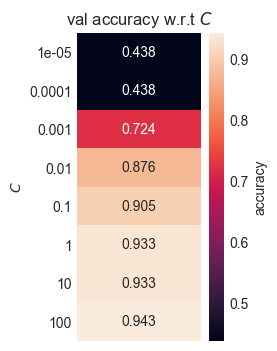

In [32]:
SVM_clfGridSearch = svmTrainValidation(X2_train_val, Y2_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [33]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
SVM_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.942857142857 from index 7.
Best C: 100
Test Accuracy Score: 0.962264150943


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.36917696  0.36917696  0.71847853  0.90047517  0.91107034  0.93966435
  0.96926642  0.97880943]
[ 0.36190476  0.36190476  0.7047619   0.88571429  0.9047619   0.92380952
  0.88571429  0.91428571]


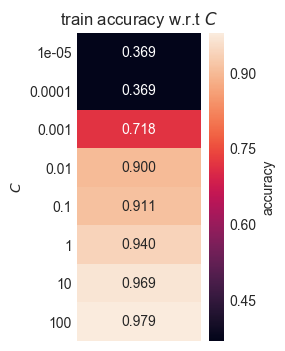

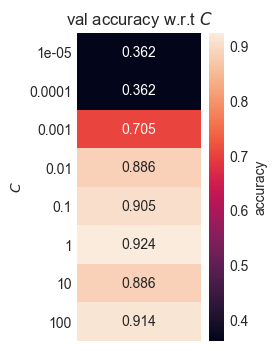

In [34]:
SVM_clfGridSearch = svmTrainValidation(X3_train_val, Y3_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [35]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
SVM_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.92380952381 from index 5.
Best C: 1
Test Accuracy Score: 0.924528301887


###### Mean of SVM's Test Accuracies on (50% train, 50% test)

In [36]:
print('SVM_accuracyTestList:' + str(SVM_accuracyTestList_50_50))
SVM_accuracyAverage_50_50 = statistics.mean(SVM_accuracyTestList_50_50)
print('SVM_accuracyTestList mean: ' + str(SVM_accuracyAverage_50_50))

SVM_accuracyTestList:[0.90566037735849059, 0.96226415094339623, 0.92452830188679247]
SVM_accuracyTestList mean: 0.930817610063


### SVM on (20% train, 80% test)
Splits the 3 shuffled datasets into 2 parts:
1. (20% of all the data points) ---> Training set + Validation Set.
2. (80% of all the data points) ---> Test set.

In [37]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.2)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.2)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.5)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

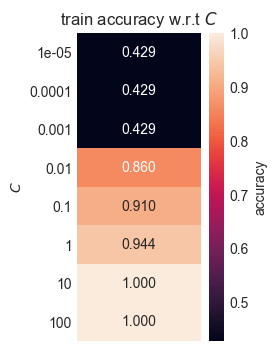

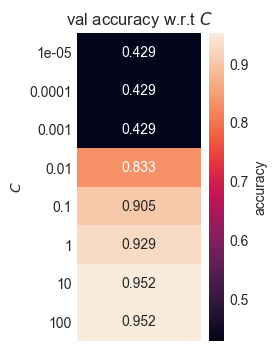

In [38]:
SVM_clfGridSearch = svmTrainValidation(X1_train_val, Y1_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [39]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
SVM_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.952380952381 from index 6.
Best C: 10
Test Accuracy Score: 0.869822485207


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

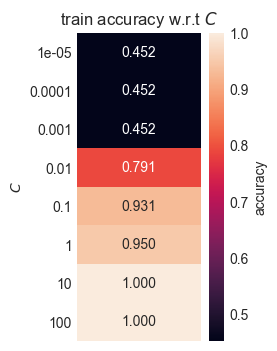

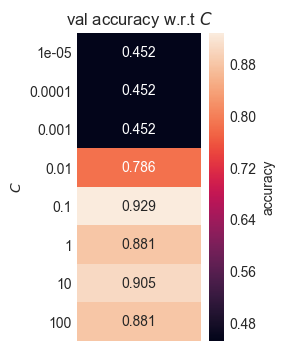

In [40]:
SVM_clfGridSearch = svmTrainValidation(X2_train_val, Y2_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [41]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
SVM_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.928571428571 from index 4.
Best C: 0.1
Test Accuracy Score: 0.89349112426


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.36917696  0.36917696  0.71847853  0.90047517  0.91107034  0.93966435
  0.96926642  0.97880943]
[ 0.36190476  0.36190476  0.7047619   0.88571429  0.9047619   0.92380952
  0.88571429  0.91428571]


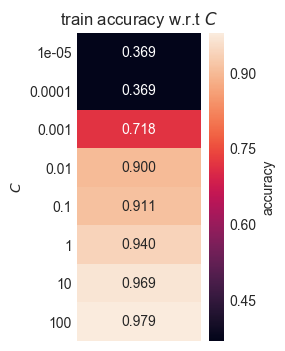

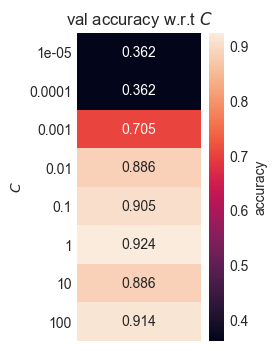

In [42]:
SVM_clfGridSearch = svmTrainValidation(X3_train_val, Y3_train_val, C_list, CV)
accuracyTrain = SVM_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = SVM_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [43]:
best_C = bestValue(accuracyValidation, C_list)
print('Best C: ' + str(best_C))

optimalClassifier = svm.SVC(kernel = 'linear', C = best_C).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
SVM_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.92380952381 from index 5.
Best C: 1
Test Accuracy Score: 0.924528301887


###### Mean of SVM's Test Accuracies on (20% train, 80% test)

In [44]:
print('SVM_accuracyTestList:' + str(SVM_accuracyTestList_20_80))
SVM_accuracyAverage_20_80 = statistics.mean(SVM_accuracyTestList_20_80)
print('SVM_accuracyTestList mean: ' + str(SVM_accuracyAverage_20_80))

SVM_accuracyTestList:[0.86982248520710059, 0.89349112426035504, 0.92452830188679247]
SVM_accuracyTestList mean: 0.895947303785


### **<font color=green>Results of SVM</font>**

In [45]:
print('SVM_accuracyTestList (80% train, 20% test) partition mean: ' + str(SVM_accuracyAverage_80_20))
print('SVM_accuracyTestList (50% train, 50% test) partition mean: ' + str(SVM_accuracyAverage_50_50))
print('SVM_accuracyTestList (20% train, 80% test) partition mean: ' + str(SVM_accuracyAverage_20_80))

SVM_accuracyTestList (80% train, 20% test) partition mean: 0.976744186047
SVM_accuracyTestList (50% train, 50% test) partition mean: 0.930817610063
SVM_accuracyTestList (20% train, 80% test) partition mean: 0.895947303785


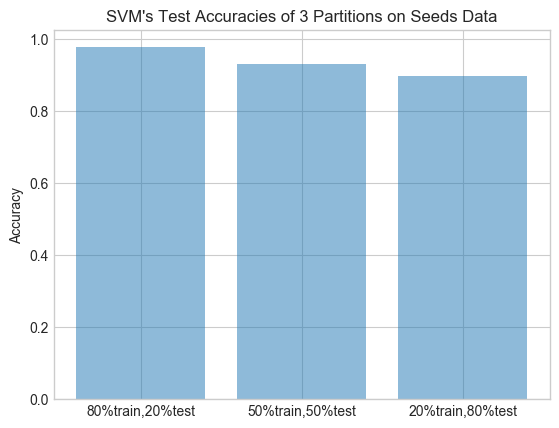

Accuracy of SVM's 3 trials on (80% train, 20% test) partition :[0.97674418604651159, 1.0, 0.95348837209302328]
Mean Accuracy of SVM on (80% train, 20% test) partition: 0.976744186047

Accuracy of SVM's 3 trials on (50% train, 50% test) partition :[0.90566037735849059, 0.96226415094339623, 0.92452830188679247]
Mean Accuracy of SVM on (50% train, 50% test) partition: 0.930817610063

Accuracy of SVM's 3 trials on (20% train, 80% test) partition:[0.86982248520710059, 0.89349112426035504, 0.92452830188679247]
Mean Accuracy of SVM on (20% train, 80% test) partition: 0.895947303785


In [46]:
displayAccuracies('SVM', 'Seeds Data',  SVM_accuracyAverage_80_20, SVM_accuracyAverage_50_50, SVM_accuracyAverage_20_80)
printAccuracies('SVM', SVM_accuracyTestList_80_20, SVM_accuracyTestList_50_50, SVM_accuracyTestList_20_80)

# Decision Tree 
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [47]:
#GLOBAL VARIABLES FOR Decision Tree
#D_list = np.asarray([1,2,3,4,5])
D_list = [1,2,3,4,5]
DT_accuracyTestList_80_20 = []
DT_accuracyTestList_50_50 = []
DT_accuracyTestList_20_80 = []

In [48]:
from sklearn import tree

def decisionTreeTrainValidation(X_train_val, Y_train_val, D_list, CV):
    
    DT_classifier = tree.DecisionTreeClassifier(criterion='entropy')

    parameters = {'max_depth': D_list}

    DT_clfGridSearch = GridSearchCV(DT_classifier, param_grid=parameters, cv=CV, return_train_score=True)
    DT_clfGridSearch.fit(X_train_val, Y_train_val)

    return DT_clfGridSearch

### Decision Tree on (80% train, 20% test)
Splits the 3 shuffled datasets into 2 parts:
1. (80% of all the data points) ---> Training set + Validation Set.
2. (20% of all the data points) ---> Test set.

In [49]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.8)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.8)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.8)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

[ 0.6607279   0.91864706  0.9385117   0.97220107  0.9920743 ]
[ 0.6547619   0.89880952  0.88690476  0.89285714  0.9047619 ]


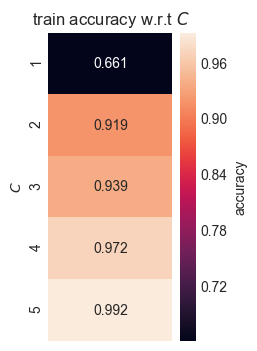

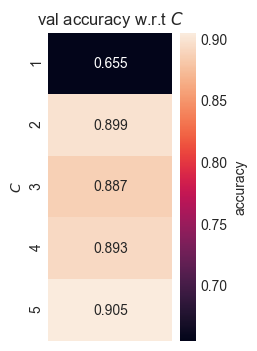

In [50]:
DT_clfGridSearch = decisionTreeTrainValidation(X1_train_val, Y1_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [51]:
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
DT_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.904761904762 from index 4.
Best D: 5
Test Accuracy Score: 0.93023255814


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.6726274   0.91069928  0.93260385  0.96624903  0.98807859]
[ 0.67261905  0.89880952  0.88095238  0.88095238  0.89285714]


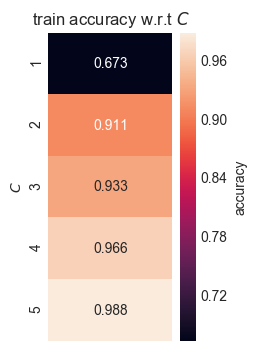

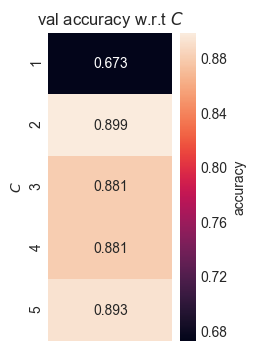

In [52]:
DT_clfGridSearch = decisionTreeTrainValidation(X2_train_val, Y2_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [53]:
#Use the best C to calculate the test accuracy.
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
DT_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.89880952381 from index 1.
Best D: 2
Test Accuracy Score: 0.953488372093


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.6547631   0.91071031  0.91996028  0.97024556  0.99140792]
[ 0.6547619   0.91071429  0.9047619   0.88095238  0.89880952]


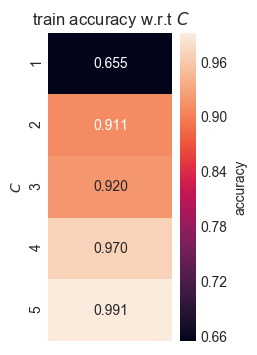

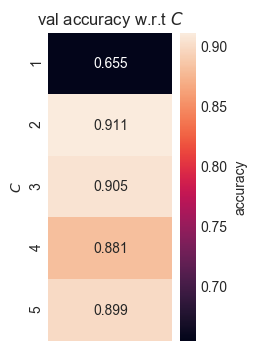

In [54]:
DT_clfGridSearch = decisionTreeTrainValidation(X3_train_val, Y3_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [55]:
#Use the best C to calculate the test accuracy.
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
DT_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.910714285714 from index 1.
Best D: 2
Test Accuracy Score: 0.953488372093


###### Mean of DT's Test Accuracies on (80% train, 20% test)

In [56]:
print('DT_accuracyTestList:' + str(DT_accuracyTestList_80_20))
DT_accuracyAverage_80_20 = statistics.mean(DT_accuracyTestList_80_20)
print('DT_accuracyTestList mean: ' + str(DT_accuracyAverage_80_20))

DT_accuracyTestList:[0.93023255813953487, 0.95348837209302328, 0.95348837209302328]
DT_accuracyTestList mean: 0.945736434109


### Decision Tree on (50% train, 50% test)
Splits the 3 shuffled datasets into 2 parts:
1. (50% of all the data points) ---> Training set + Validation Set.
2. (50% of all the data points) ---> Test set.

In [57]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.5)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.5)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.5)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

[ 0.67618213  0.92270401  0.9279562   0.97881132  0.99892473]
[ 0.67619048  0.86666667  0.87619048  0.88571429  0.87619048]


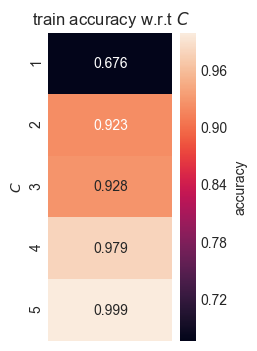

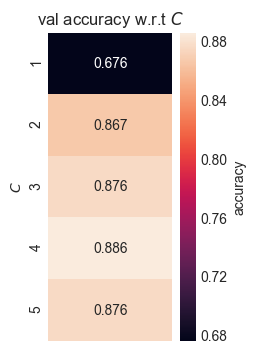

In [58]:
DT_clfGridSearch = decisionTreeTrainValidation(X1_train_val, Y1_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [59]:
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
DT_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.885714285714 from index 3.
Best D: 4
Test Accuracy Score: 0.858490566038


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.7524022   0.93649623  0.97142888  1.          1.        ]
[ 0.74285714  0.87619048  0.86666667  0.88571429  0.88571429]


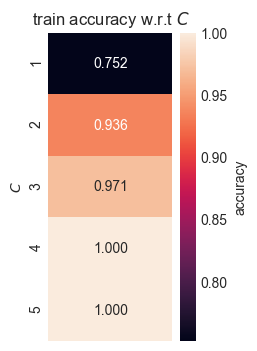

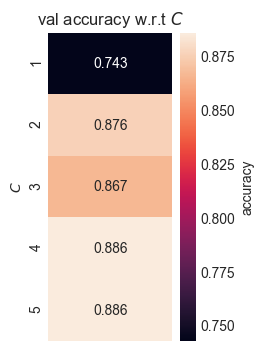

In [60]:
DT_clfGridSearch = decisionTreeTrainValidation(X2_train_val, Y2_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [61]:
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
DT_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.885714285714 from index 3.
Best D: 4
Test Accuracy Score: 0.88679245283


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.6666704   0.90467497  0.94705682  0.98303186  0.99358246]
[ 0.66666667  0.88571429  0.9047619   0.91428571  0.91428571]


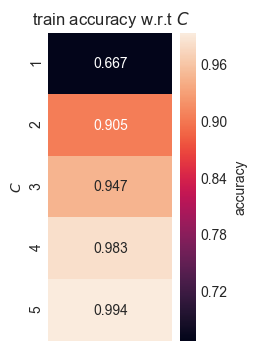

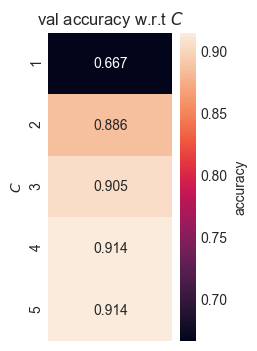

In [62]:
DT_clfGridSearch = decisionTreeTrainValidation(X3_train_val, Y3_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [63]:
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
DT_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.914285714286 from index 3.
Best D: 4
Test Accuracy Score: 0.905660377358


###### Mean of DT's Test Accuracies on (50% train, 50% test)

In [64]:
print('DT_accuracyTestList:' + str(DT_accuracyTestList_50_50))
DT_accuracyAverage_50_50 = statistics.mean(DT_accuracyTestList_50_50)
print('DT_accuracyTestList mean: ' + str(DT_accuracyAverage_50_50))

DT_accuracyTestList:[0.85849056603773588, 0.8867924528301887, 0.90566037735849059]
DT_accuracyTestList mean: 0.883647798742


### Decision Tree on (20% train, 80% test)
Splits the 3 shuffled datasets into 2 parts:
1. (20% of all the data points) ---> Training set + Validation Set.
2. (80% of all the data points) ---> Test set.

In [65]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.2)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.2)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.2)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

[ 0.71434998  1.          1.          1.          1.        ]
[ 0.71428571  0.95238095  0.95238095  0.95238095  0.95238095]


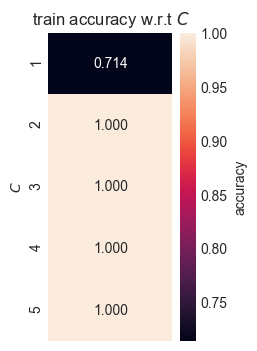

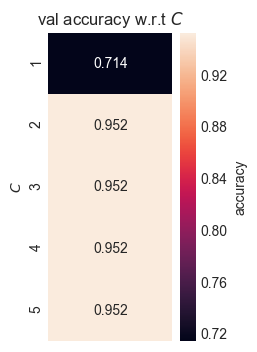

In [66]:
DT_clfGridSearch = decisionTreeTrainValidation(X1_train_val, Y1_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [67]:
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
DT_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.952380952381 from index 1.
Best D: 2
Test Accuracy Score: 0.863905325444


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.76184484  0.97616989  0.98413576  1.          1.        ]
[ 0.73809524  0.88095238  0.85714286  0.88095238  0.83333333]


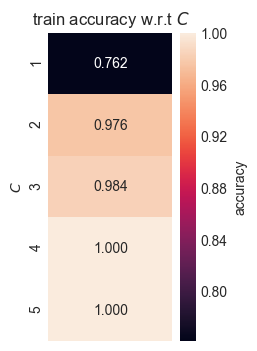

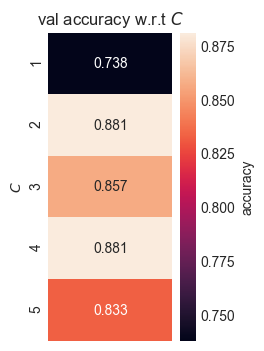

In [68]:
DT_clfGridSearch = decisionTreeTrainValidation(X2_train_val, Y2_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [69]:
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
DT_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.880952380952 from index 1.
Best D: 2
Test Accuracy Score: 0.905325443787


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.73804847  0.97630485  1.          1.          1.        ]
[ 0.71428571  0.95238095  0.95238095  0.92857143  0.95238095]


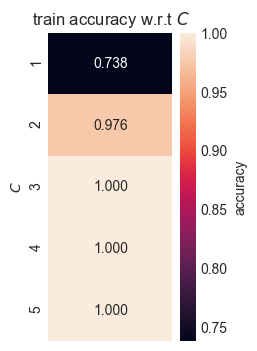

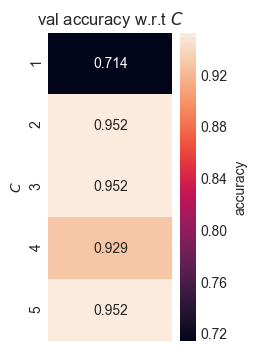

In [70]:
DT_clfGridSearch = decisionTreeTrainValidation(X3_train_val, Y3_train_val, D_list, CV)
accuracyTrain = DT_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = DT_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', D_list)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', D_list)

In [71]:
best_D = bestValue(accuracyValidation, D_list)
print('Best D: ' + str(best_D))

optimalClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_D).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
DT_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.952380952381 from index 1.
Best D: 2
Test Accuracy Score: 0.905325443787


###### Mean of DT's Test Accuracies on (20% train, 80% test)

In [72]:
print('DT_accuracyTestList:' + str(DT_accuracyTestList_20_80))
DT_accuracyAverage_20_80 = statistics.mean(DT_accuracyTestList_20_80)
print('DT_accuracyTestList mean: ' + str(DT_accuracyAverage_20_80))

DT_accuracyTestList:[0.86390532544378695, 0.90532544378698221, 0.90532544378698221]
DT_accuracyTestList mean: 0.891518737673


### **<font color=green>Results of Decision Tree</font>**

In [73]:
print('DT_accuracyTestList (80% train, 20% test) partition mean: ' + str(DT_accuracyAverage_80_20))
print('DT_accuracyTestList (50% train, 50% test) partition mean: ' + str(DT_accuracyAverage_50_50))
print('DT_accuracyTestList (20% train, 80% test) partition mean: ' + str(DT_accuracyAverage_20_80))

DT_accuracyTestList (80% train, 20% test) partition mean: 0.945736434109
DT_accuracyTestList (50% train, 50% test) partition mean: 0.883647798742
DT_accuracyTestList (20% train, 80% test) partition mean: 0.891518737673


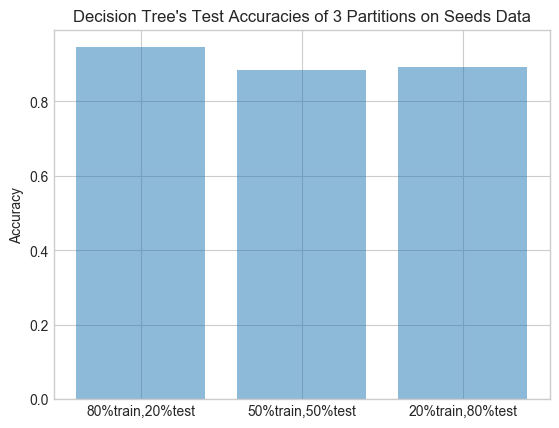

Accuracy of DT's 3 trials on (80% train, 20% test) partition :[0.93023255813953487, 0.95348837209302328, 0.95348837209302328]
Mean Accuracy of DT on (80% train, 20% test) partition: 0.945736434109

Accuracy of DT's 3 trials on (50% train, 50% test) partition :[0.85849056603773588, 0.8867924528301887, 0.90566037735849059]
Mean Accuracy of DT on (50% train, 50% test) partition: 0.883647798742

Accuracy of DT's 3 trials on (20% train, 80% test) partition:[0.86390532544378695, 0.90532544378698221, 0.90532544378698221]
Mean Accuracy of DT on (20% train, 80% test) partition: 0.891518737673


In [74]:
displayAccuracies('Decision Tree', 'Seeds Data', DT_accuracyAverage_80_20, DT_accuracyAverage_50_50, DT_accuracyAverage_20_80)
printAccuracies('DT', DT_accuracyTestList_80_20, DT_accuracyTestList_50_50, DT_accuracyTestList_20_80)

# Random Forest
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [75]:
#Global Variables For Random Forest
max_depth_List = [1,2,3,4,5]
RF_accuracyTestList_80_20 = []
RF_accuracyTestList_50_50 = []
RF_accuracyTestList_20_80 = []

In [76]:
from sklearn.ensemble import RandomForestClassifier

#max_depth_List: The chosen hyperparameter.
#cv: Number of folds when doing cross validation.
def randomForestTrainValidation(X_train_val, Y_train_val, max_depth_List, CV):
    
    #svm_classifier = svm.SVC(kernel = 'linear')
    RF_classifier = RandomForestClassifier()
  
    parameters = {'max_depth':max_depth_List}
    
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
    
    RF_clfGridSearch = GridSearchCV(RF_classifier, param_grid=parameters, cv=CV, return_train_score=True)
    RF_clfGridSearch.fit(X_train_val, Y_train_val)

    return RF_clfGridSearch

### Random Forest on (80% train, 20% test)
Splits the 3 shuffled datasets into 2 parts:
1. (80% of all the data points) ---> Training set + Validation Set.
2. (20% of all the data points) ---> Test set.

In [77]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.8)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.8)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.8)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

[ 0.86751032  0.92450292  0.9510731   0.97354317  0.99009615]
[ 0.85119048  0.89880952  0.89285714  0.9047619   0.89880952]


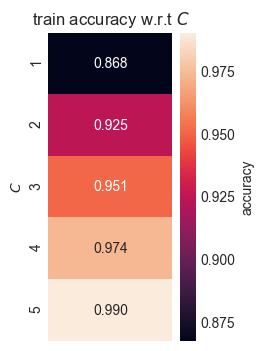

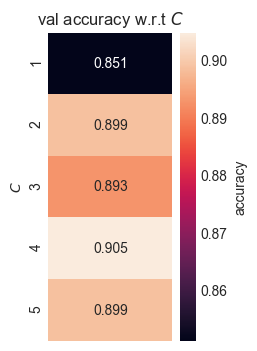

In [78]:
RF_clfGridSearch = randomForestTrainValidation(X1_train_val, Y1_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [79]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
RF_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.904761904762 from index 3.
Best max_depth: 4
Test Accuracy Score: 0.93023255814


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.84872507  0.91402384  0.93522201  0.97751254  0.98545579]
[ 0.8452381   0.89880952  0.91666667  0.91071429  0.91071429]


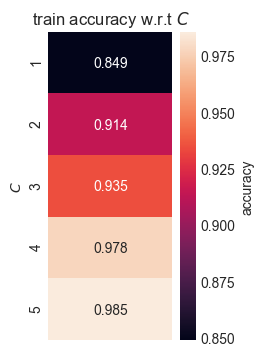

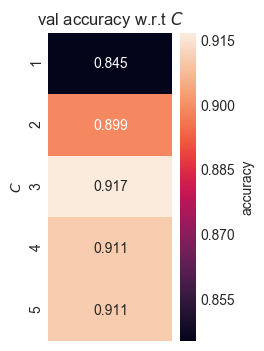

In [80]:
RF_clfGridSearch = randomForestTrainValidation(X2_train_val, Y2_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [81]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
RF_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.916666666667 from index 2.
Best max_depth: 3
Test Accuracy Score: 0.953488372093


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.87837228  0.90938598  0.93978937  0.97286418  0.98544307]
[ 0.83928571  0.875       0.86904762  0.92261905  0.89285714]


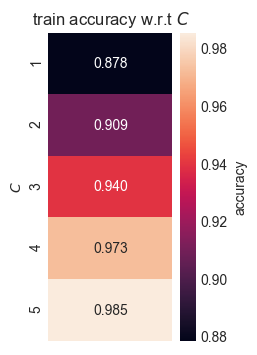

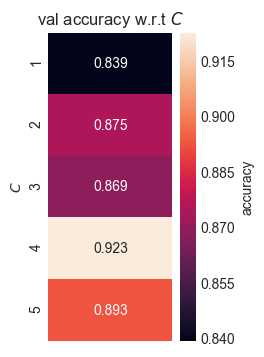

In [82]:
RF_clfGridSearch = randomForestTrainValidation(X3_train_val, Y3_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [83]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
RF_accuracyTestList_80_20.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.922619047619 from index 3.
Best max_depth: 4
Test Accuracy Score: 0.976744186047


###### Mean of RF's Test Accuracies on (80% train, 20% test)

In [84]:
print('RF_accuracyTestList:' + str(RF_accuracyTestList_80_20))
RF_accuracyAverage_80_20 = statistics.mean(RF_accuracyTestList_80_20)
print('RF_accuracyTestList mean: ' + str(RF_accuracyAverage_80_20))

RF_accuracyTestList:[0.93023255813953487, 0.95348837209302328, 0.97674418604651159]
RF_accuracyTestList mean: 0.953488372093


### Random Forest on (50% train, 50% test)
Splits the 3 shuffled datasets into 2 parts:
1. (50% of all the data points) ---> Training set + Validation Set.
2. (50% of all the data points) ---> Test set.

In [85]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.5)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.5)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.5)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

[ 0.86006666  0.92903218  0.94915654  0.98200234  0.9957666 ]
[ 0.80952381  0.86666667  0.86666667  0.88571429  0.8952381 ]


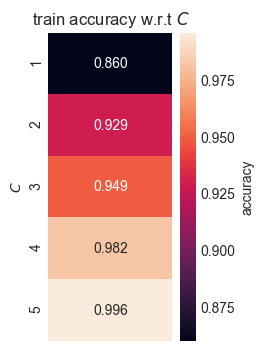

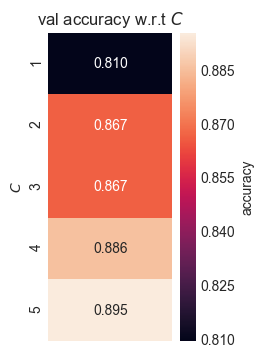

In [86]:
RF_clfGridSearch = randomForestTrainValidation(X1_train_val, Y1_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [87]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
RF_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.895238095238 from index 4.
Best max_depth: 5
Test Accuracy Score: 0.943396226415


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.8568291   0.93548745  0.96290609  0.98626887  0.99681923]
[ 0.82857143  0.93333333  0.9047619   0.8952381   0.87619048]


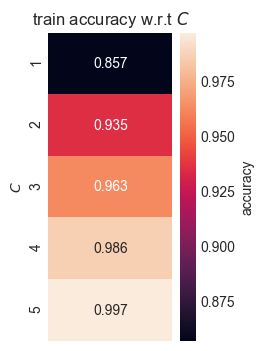

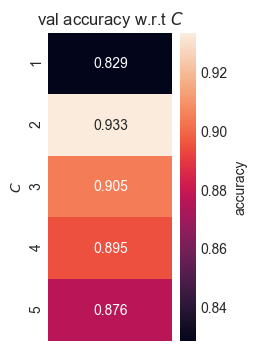

In [88]:
RF_clfGridSearch = randomForestTrainValidation(X2_train_val, Y2_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [89]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
RF_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.933333333333 from index 1.
Best max_depth: 2
Test Accuracy Score: 0.877358490566


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.83284501  0.91741066  0.94922952  0.97776752  0.99364919]
[ 0.79047619  0.84761905  0.84761905  0.8952381   0.85714286]


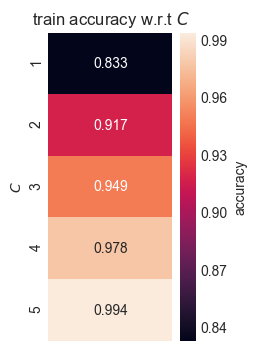

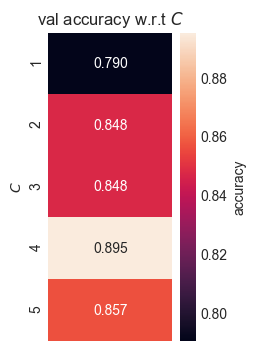

In [90]:
RF_clfGridSearch = randomForestTrainValidation(X3_train_val, Y3_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [91]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
RF_accuracyTestList_50_50.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.895238095238 from index 3.
Best max_depth: 4
Test Accuracy Score: 0.933962264151


###### Mean of RF's Test Accuracies on (50% train, 50% test)

In [92]:
print('RF_accuracyTestList:' + str(RF_accuracyTestList_50_50))
RF_accuracyAverage_50_50 = statistics.mean(RF_accuracyTestList_50_50)
print('RF_accuracyTestList mean: ' + str(RF_accuracyAverage_50_50))

RF_accuracyTestList:[0.94339622641509435, 0.87735849056603776, 0.93396226415094341]
RF_accuracyTestList mean: 0.918238993711


### Random Forest on (20% train, 80% test)
Splits the 3 shuffled datasets into 2 parts:
1. (20% of all the data points) ---> Training set + Validation Set.
2. (80% of all the data points) ---> Test set.

In [93]:
X1_train_val, Y1_train_val, X1_test, Y1_test = partitionData(X1, Y1, 0.2)
X2_train_val, Y2_train_val, X2_test, Y2_test = partitionData(X2, Y2, 0.2)
X3_train_val, Y3_train_val, X3_test, Y3_test = partitionData(X3, Y3, 0.2)

###### 1st Run)
First run uses the variables; X1_train_val, Y1_train_val, X1_test, Y1_test

[ 0.90744489  0.99722222  1.          0.99459064  1.        ]
[ 0.88095238  0.92857143  0.92857143  0.9047619   0.97619048]


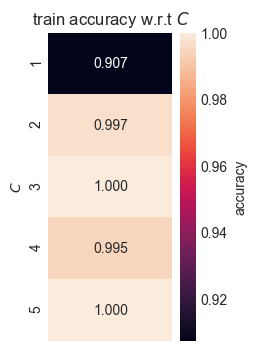

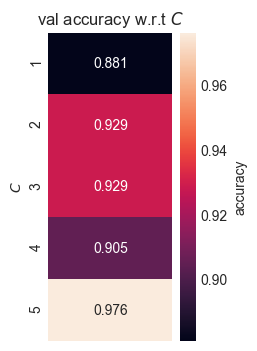

In [94]:
RF_clfGridSearch = randomForestTrainValidation(X1_train_val, Y1_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [95]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X1_train_val, Y1_train_val)
pred = optimalClassifier.predict(X1_test)

accuracyTest = accuracy_score(Y1_test, pred)
RF_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.97619047619 from index 4.
Best max_depth: 5
Test Accuracy Score: 0.881656804734


###### 2nd Run)
Second run uses the variables; X2_train_val, Y2_train_val, X2_test, Y2_test

[ 0.82841668  0.95241091  0.97360944  0.98933144  0.99736842]
[ 0.78571429  0.83333333  0.88095238  0.85714286  0.9047619 ]


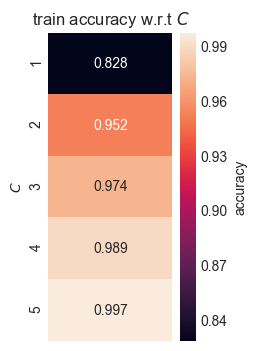

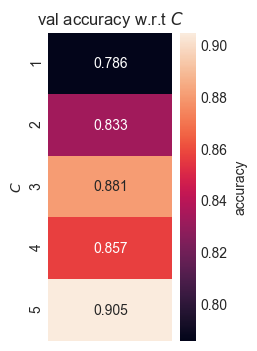

In [96]:
RF_clfGridSearch = randomForestTrainValidation(X2_train_val, Y2_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [97]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X2_train_val, Y2_train_val)
pred = optimalClassifier.predict(X2_test)

accuracyTest = accuracy_score(Y2_test, pred)
RF_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.904761904762 from index 4.
Best max_depth: 5
Test Accuracy Score: 0.881656804734


###### 3rd Run)
Third run uses the variables; X3_train_val, Y3_train_val, X3_test, Y3_test

[ 0.81252963  0.96050048  0.98960499  0.98149688  0.99473319]
[ 0.78571429  0.88095238  0.9047619   0.88095238  0.9047619 ]


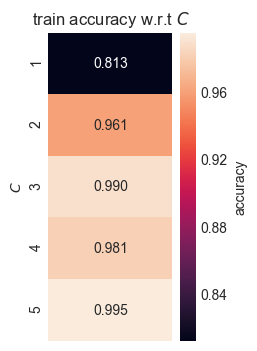

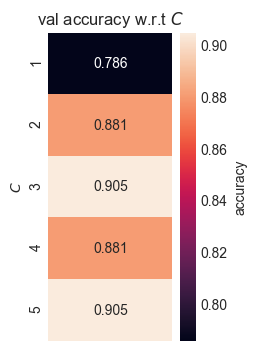

In [98]:
RF_clfGridSearch = randomForestTrainValidation(X3_train_val, Y3_train_val, max_depth_List, CV)
accuracyTrain = RF_clfGridSearch.cv_results_['mean_train_score']
accuracyValidation = RF_clfGridSearch.cv_results_['mean_test_score']
print(accuracyTrain)        #This is what shows up in the heat maps.
print(accuracyValidation)   #This is what shows up in the heat maps.

train_acc = (accuracyTrain).reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', max_depth_List)
val_acc = (accuracyValidation).reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', max_depth_List)

In [99]:
best_max_depth = bestValue(accuracyValidation, max_depth_List)
print('Best max_depth: ' + str(best_max_depth))

optimalClassifier = RandomForestClassifier(max_depth=best_max_depth).fit(X3_train_val, Y3_train_val)
pred = optimalClassifier.predict(X3_test)

accuracyTest = accuracy_score(Y3_test, pred)
RF_accuracyTestList_20_80.append(accuracyTest)
print('Test Accuracy Score: ' + str(accuracyTest))

Largest value in accuracyValidation is 0.904761904762 from index 2.
Best max_depth: 3
Test Accuracy Score: 0.905325443787


###### Mean of RF's Test Accuracies on (20% train, 80% test)

In [100]:
print('RT_accuracyTestList:' + str(RF_accuracyTestList_20_80))
RF_accuracyAverage_20_80 = statistics.mean(RF_accuracyTestList_20_80)
print('RT_accuracyTestList mean: ' + str(RF_accuracyAverage_20_80))

RT_accuracyTestList:[0.88165680473372776, 0.88165680473372776, 0.90532544378698221]
RT_accuracyTestList mean: 0.889546351085


### **<font color=green>Results of Random Forest</font>**

In [101]:
print('RT_accuracyTestList (80% train, 20% test) partition mean: ' + str(RF_accuracyAverage_80_20))
print('RT_accuracyTestList (50% train, 50% test) partition mean: ' + str(RF_accuracyAverage_50_50))
print('RT_accuracyTestList (20% train, 80% test) partition mean: ' + str(RF_accuracyAverage_20_80))

RT_accuracyTestList (80% train, 20% test) partition mean: 0.953488372093
RT_accuracyTestList (50% train, 50% test) partition mean: 0.918238993711
RT_accuracyTestList (20% train, 80% test) partition mean: 0.889546351085


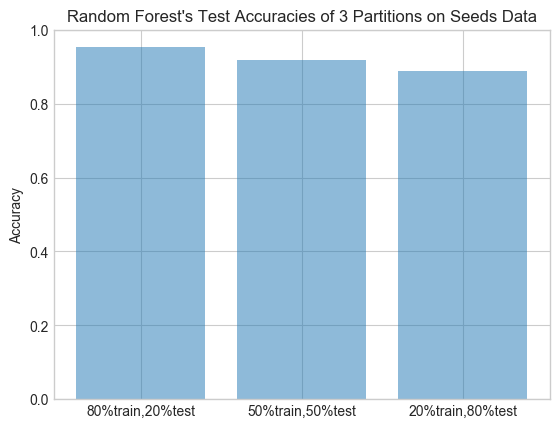

Accuracy of RT's 3 trials on (80% train, 20% test) partition :[0.93023255813953487, 0.95348837209302328, 0.97674418604651159]
Mean Accuracy of RT on (80% train, 20% test) partition: 0.953488372093

Accuracy of RT's 3 trials on (50% train, 50% test) partition :[0.94339622641509435, 0.87735849056603776, 0.93396226415094341]
Mean Accuracy of RT on (50% train, 50% test) partition: 0.918238993711

Accuracy of RT's 3 trials on (20% train, 80% test) partition:[0.88165680473372776, 0.88165680473372776, 0.90532544378698221]
Mean Accuracy of RT on (20% train, 80% test) partition: 0.889546351085


In [102]:
displayAccuracies('Random Forest', 'Seeds Data', RF_accuracyAverage_80_20, RF_accuracyAverage_50_50, RF_accuracyAverage_20_80)
printAccuracies('RT', RF_accuracyTestList_80_20, RF_accuracyTestList_50_50, RF_accuracyTestList_20_80)

# Results

In [103]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                #'%d' % int(height),
                '%d' % int(height) + '%',
                ha='center', va='bottom')

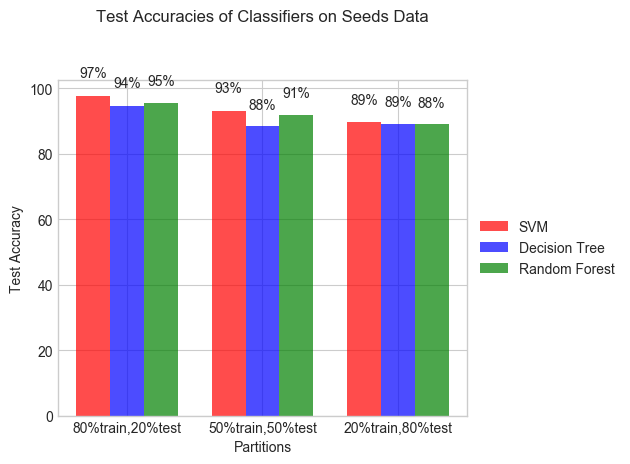

In [104]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 3
SVM_partitions = (SVM_accuracyAverage_80_20*100, SVM_accuracyAverage_50_50*100, SVM_accuracyAverage_20_80*100)
DT_partitions = (DT_accuracyAverage_80_20*100, DT_accuracyAverage_50_50*100, DT_accuracyAverage_20_80*100)
RT_partitions = (RF_accuracyAverage_80_20*100, RF_accuracyAverage_50_50*100, RF_accuracyAverage_20_80*100)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = .25
opacity = .7
 
SVM = plt.bar(index, SVM_partitions, bar_width,#align='center',
                 alpha=opacity,
                 color='r',
                 label='SVM')
 
DT = plt.bar(index + bar_width, DT_partitions, bar_width,#align='center',
                 alpha=opacity,
                 color='b',
                 label='Decision Tree')

RT = plt.bar(index + bar_width + bar_width, RT_partitions, bar_width,#align='center',
                 alpha=opacity,
                 color='g',
                 label='Random Forest')
 
plt.xlabel('Partitions')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracies of Classifiers on Seeds Data', y=1.15)
plt.xticks(index + bar_width, ('80%train,20%test', '50%train,50%test', '20%train,80%test'))
#plt.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

autolabel(SVM)
autolabel(DT)
autolabel(RT)

plt.tight_layout()
plt.grid()
plt.show()